In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import src.abm2d as abm2d

In [2]:
# Generate simulation data with base parameter values if needed
if not os.path.isfile("../data/abm2d_base_params.npz"):
    abm2d(path = "../data",
          title = "abm2d_base_params")

In [ ]:
out = np.load("../data/abm2d_base_params.npz")

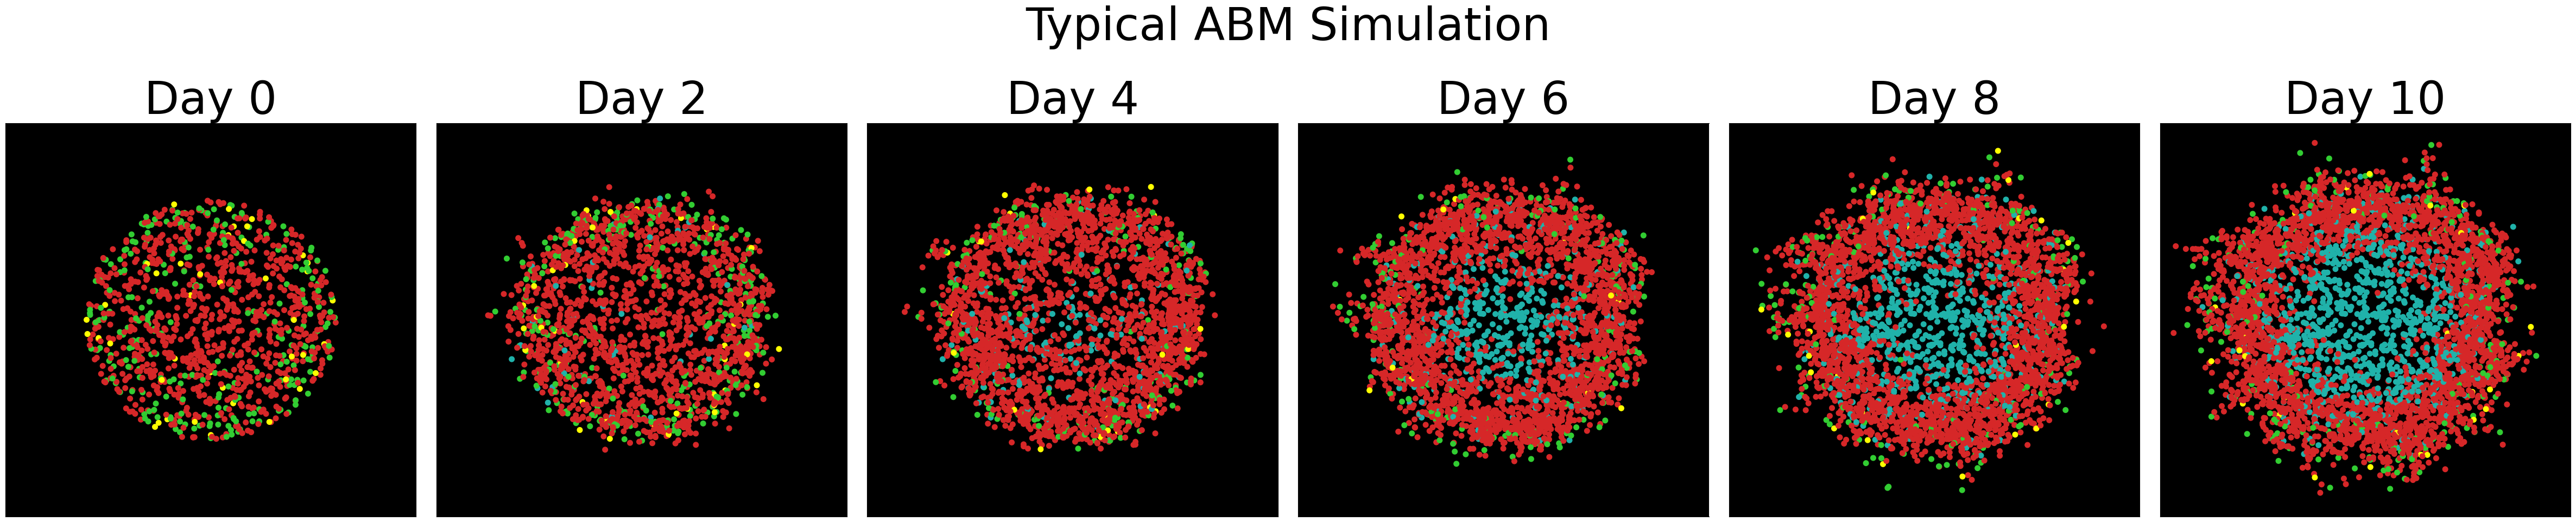

In [23]:
fig, ax  = plt.subplots(1,6, figsize=(48,10))
fontsize = 20
L = out['L']
Xs = out['X'] - L/2
Ys = out['Y'] - L/2
states = out['state'].astype(int)
for i, day in enumerate(np.arange(0,11,2)):
    X = Xs[day]
    Y = Ys[day]
    state = states[day]
    title = f"Day {day}"
    
    colormap = np.array(["lightseagreen", "tab:red", "yellow", "limegreen"])
    ax[i].scatter(X,Y,c=colormap[state], s = 48)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(title,fontsize=3*fontsize)
    ax[i].set_xlim(-400,400)
    ax[i].set_ylim(-400,400)
    ax[i].set_facecolor('black')
    ax[i].grid(True, color = 'white', linestyle = '--')
fig.suptitle("Typical ABM Simulation", fontsize = 60)
fig.tight_layout()
fig.savefig(f'../figures/typical_abm_simulation.png')

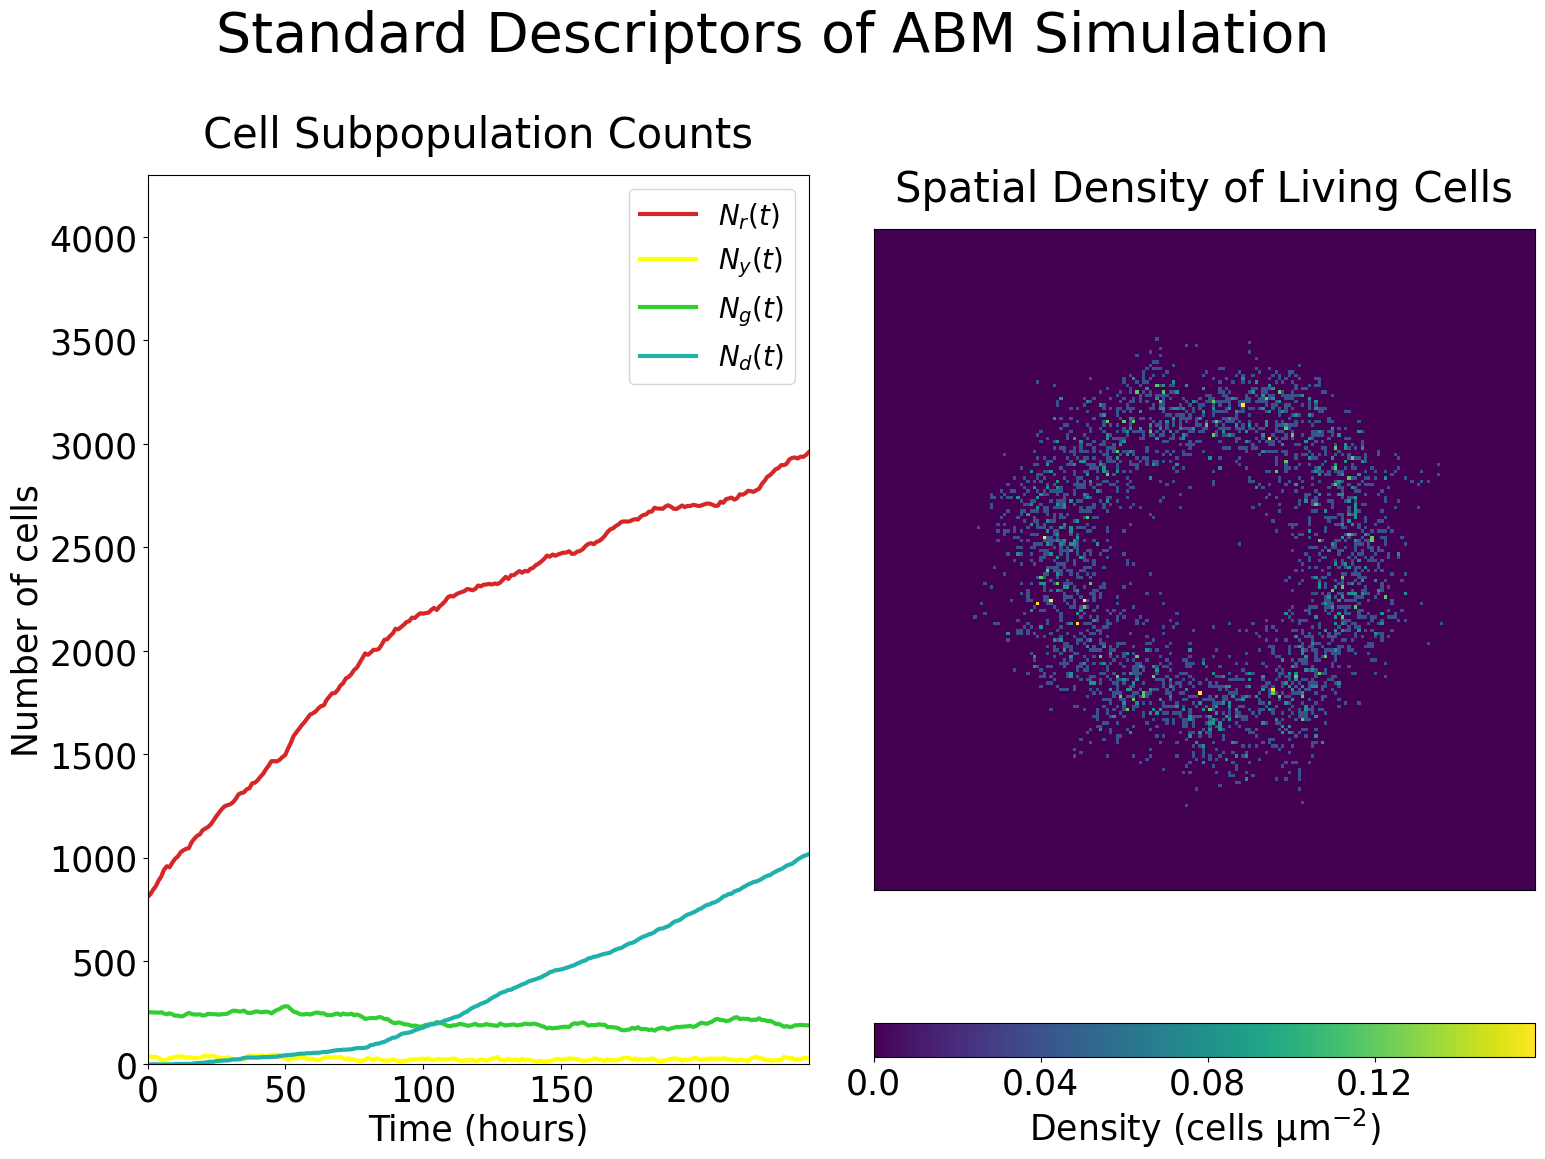

In [30]:

v = out['v']

h = out['L']/(out['I'] - 1)

Nr = out['Nr']
Ny = out['Ny']
Ng = out['Ng']
Nd = out['Nd']

fig, ax = plt.subplots(1,2, figsize = (16,12))
fontsize = 20

ax[0].plot(np.arange(0,241), Nr,linewidth = 3, color = 'tab:red', label = '$N_r(t)$')
ax[0].plot(np.arange(0,241), Ny,linewidth = 3, color = 'yellow',  label = '$N_y(t)$')
ax[0].plot(np.arange(0,241), Ng,linewidth = 3, color = 'limegreen',  label = '$N_g(t)$')
ax[0].plot(np.arange(0,241), Nd,linewidth = 3, color = 'lightseagreen',  label = '$N_d(t)$')
ax[0].set_xlim(0,240)
ax[0].set_ylim(0,4300)
ax[0].set_xlabel('Time (hours)')
ax[0].set_ylabel('Number of cells')
ax[0].set_title('Cell Subpopulation Counts', pad=20)
ax[0].legend(loc='best', fontsize = fontsize)


im = ax[1].imshow(v.reshape(out['I'],out['I']))
cbar = plt.colorbar(im, ax = ax[1], fraction = 0.046,orientation = 'horizontal',ticks = [0.00, 0.04, 0.08, 0.12, 0.16], label = 'Density $(\mathrm{cells}~\mathrm{\mu m}^{-2})$')

cbar.ax.set_xticklabels([0.00, 0.04, 0.08, 0.12, 0.16])

# ax[1].set_xlabel('$x$')
# ax[1].set_ylabel('$y$')

# ax[1].set_yticks(ticks = ax[1].get_yticks()[1:-1], labels = [int(y*h) for y in ax[1].get_yticks()[1:-1]])
# ax[1].set_xticks(ticks = ax[1].get_xticks()[1:-1], labels = [int(x*h) for x in ax[1].get_xticks()[1:-1]])
ax[1].set_yticks([])
ax[1].set_xticks([])
ax[1].invert_yaxis()
ax[1].set_title('Spatial Density of Living Cells', pad=20)
plt.rcParams.update({'font.size': 25})
fig.suptitle('Standard Descriptors of ABM Simulation', fontsize = 2*fontsize)
fig.tight_layout()
plt.savefig('../figures/methods_overview.png')